<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/sigmoid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem

In [4]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
#Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
epoch = 100000
learning_rate = 0.01
input_layer_neurons = 2  # number of features
hidden_layer_neurons = 3  # number of hidden neurons
output_neurons = 1  # number of output neurons

In [7]:
np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))

In [8]:
for epoch in range(epoch):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_output = sigmoid(final_input)

    # Backward propagation
    error = Y - final_output
    d_final_output = error * sigmoid_derivative(final_output)

    error_hidden_layer = d_final_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

In [9]:
print("Final output after training:")
print(final_output)

# Compute the mean squared error
mse = np.mean(np.square(Y - final_output))
print("Mean Squared Error:",mse)

Final output after training:
[[0.12522766]
 [0.91304128]
 [0.91330697]
 [0.05990305]]
Mean Squared Error: 0.008586961395915294


In [10]:
test_data = [0, 1]
hidden_layer_input = np.dot(test_data, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
final_input = np.dot(hidden_layer_output, weights_hidden_output)
final_output = sigmoid(final_input)
print("Test data:", test_data)
print("Predicted output:", final_output)
print("Actual output:", Y[1])  # Expected output for XOR(0, 1) is 1

Test data: [0, 1]
Predicted output: [0.91304216]
Actual output: [1]


In [11]:
print("Weights from input to hidden layer:")
print(np.round(weights_input_hidden, 2))  # Use np.round for NumPy arrays

print("Weights from hidden to output layer:")
print(np.round(weights_hidden_output, 2))  # Use np.round for NumPy arrays

Weights from input to hidden layer:
[[-2.56  5.07  4.92]
 [ 4.91 -2.64  4.94]]
Weights from hidden to output layer:
[[-6.75]
 [-6.7 ]
 [ 9.57]]


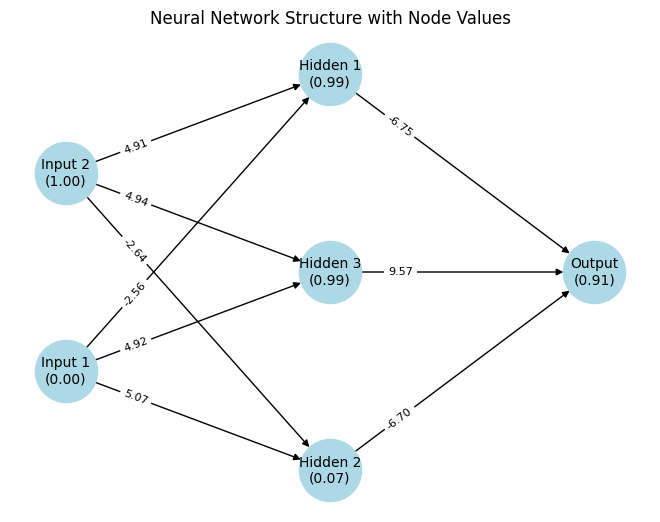

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()

    # Input layer
    for i in range(input_layer_neurons):
        G.add_node(f'Input {i+1}', layer=0, value=input_values[i])  # Assign layer 0 for input nodes

    # Hidden layer
    for i in range(hidden_layer_neurons):
        G.add_node(f'Hidden {i+1}', layer=1, value=hidden_values[i])  # Assign layer 1 for hidden nodes

    # Output layer
    G.add_node('Output', layer=2, value=output_value)  # Assign layer 2 for output node

    # Add edges from input to hidden layer
    for i in range(input_layer_neurons):
        for j in range(hidden_layer_neurons):
            G.add_edge(f'Input {i+1}', f'Hidden {j+1}', weight=round(weights_input_hidden[i][j], 2))

    # Add edges from hidden to output layer
    for i in range(hidden_layer_neurons):
        G.add_edge(f'Hidden {i+1}', 'Output', weight=round(weights_hidden_output[i][0], 2))

    # Use multipartite layout with explicit layer ordering
    pos = nx.multipartite_layout(G, subset_key="layer")

    # Draw the graph
    node_labels = {
        node: f"{node}\n({data['value']:.2f})" if np.isscalar(data['value']) else f"{node}\n({data['value'].item():.2f})"
        for node, data in G.nodes(data=True)
    }  # Add node values
    edge_labels = {
        (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
    }  # Round edge weights to 2 decimal places

    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.25
    )  # Adjust label_pos to avoid overlap
    plt.title("Neural Network Structure with Node Values")
    plt.show()

# Example usage
input_values = [0, 1]  # Example input values
hidden_layer_input = np.dot(input_values, weights_input_hidden)
hidden_values = sigmoid(hidden_layer_input)  # Hidden layer activations
final_input = np.dot(hidden_values, weights_hidden_output)
output_value = sigmoid(final_input)  # Output value

plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value)

Activation Function: sigmoid, Mean Squared Error: 0.008586794958653728


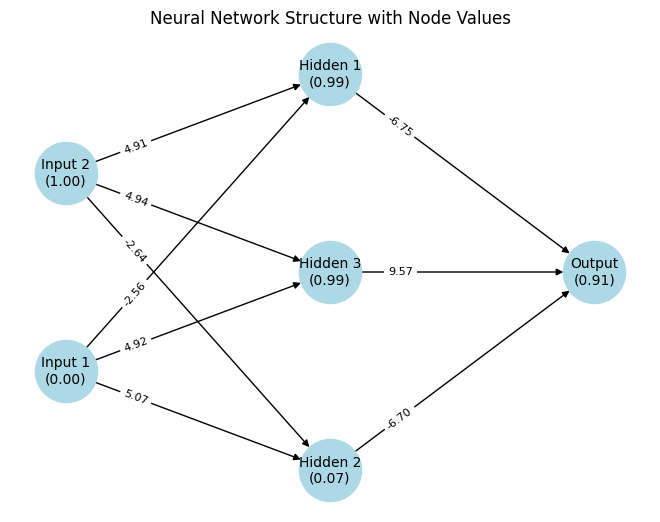

Activation Function: tanh, Mean Squared Error: 5.618674689286878e-07


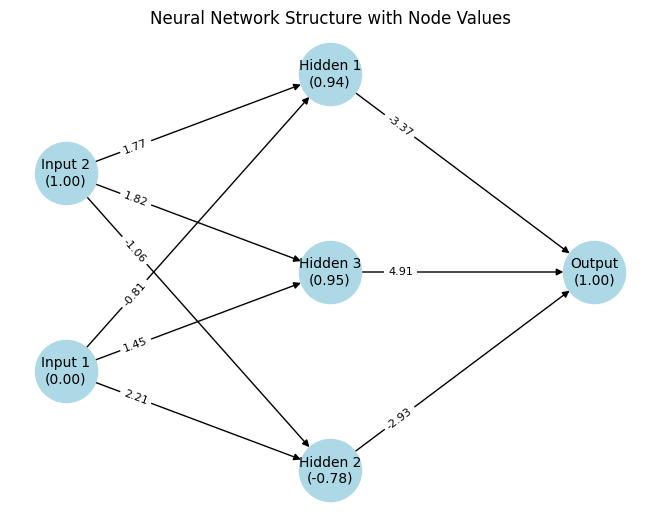

Activation Function: relu, Mean Squared Error: 0.3333333333333333


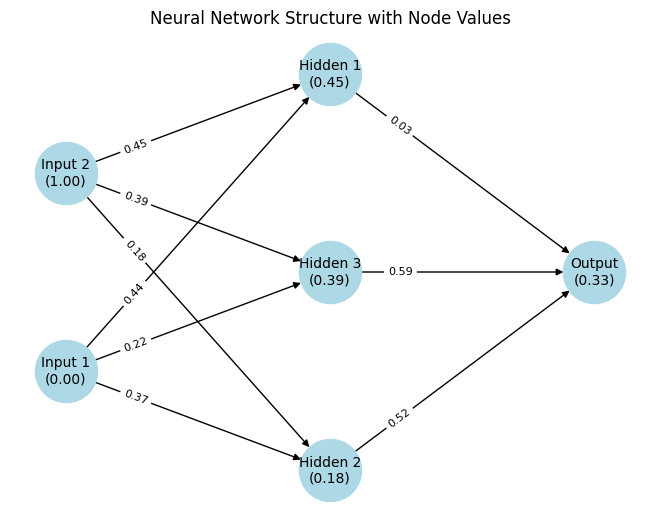

In [14]:
!pip install networkx matplotlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Activation Functions and Their Derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, activation_function, input_neurons, hidden_neurons, output_neurons):
        # Assign the actual activation function instead of the string name
        self.activation_function = {
            'sigmoid': sigmoid,
            'tanh': tanh,
            'relu': relu
        }[activation_function]

        self.activation_derivative = {
            'sigmoid': sigmoid_derivative,
            'tanh': tanh_derivative,
            'relu': relu_derivative
        }[activation_function]

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons

        np.random.seed(0)
        self.weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
        self.weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
        self.bias_hidden = np.random.uniform(size=(1, hidden_neurons))

    def train(self, X, Y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward Propagation
            hidden_layer_input = np.dot(X, self.weights_input_hidden)
            hidden_layer_output = self.activation_function(hidden_layer_input)

            final_input = np.dot(hidden_layer_output, self.weights_hidden_output)
            final_output = self.activation_function(final_input)

            # Backward Propagation
            error = Y - final_output
            d_final_output = error * self.activation_derivative(final_output)

            error_hidden_layer = d_final_output.dot(self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * self.activation_derivative(hidden_layer_output)

            # Update Weights and Biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden)
        hidden_layer_output = self.activation_function(hidden_layer_input)
        final_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        final_output = self.activation_function(final_input)
        return final_output

    def plot_neural_network(self, input_values):
        """Plots the neural network structure with node values."""

        hidden_layer_input = np.dot(input_values, self.weights_input_hidden)
        hidden_values = self.activation_function(hidden_layer_input)  # Hidden layer activations
        final_input = np.dot(hidden_values, self.weights_hidden_output)
        output_value = self.activation_function(final_input)  # Output value

        G = nx.DiGraph()

        # Input layer
        for i in range(self.input_neurons):
            G.add_node(f'Input {i+1}', layer=0, value=input_values[i])  # Assign layer 0 for input nodes

        # Hidden layer
        for i in range(self.hidden_neurons):
            G.add_node(f'Hidden {i+1}', layer=1, value=hidden_values[i])  # Assign layer 1 for hidden nodes

        # Output layer
        G.add_node('Output', layer=2, value=output_value)  # Assign layer 2 for output node

        # Add edges from input to hidden layer
        for i in range(self.input_neurons):
            for j in range(self.hidden_neurons):
                G.add_edge(f'Input {i+1}', f'Hidden {j+1}', weight=round(self.weights_input_hidden[i][j], 2))

        # Add edges from hidden to output layer
        for i in range(self.hidden_neurons):
            G.add_edge(f'Hidden {i+1}', 'Output', weight=round(self.weights_hidden_output[i][0], 2))

        # Use multipartite layout with explicit layer ordering
        pos = nx.multipartite_layout(G, subset_key="layer")

        # Draw the graph
        node_labels = {
            node: f"{node}\n({data['value']:.2f})" if np.isscalar(data['value']) else f"{node}\n({data['value'].item():.2f})"
            for node, data in G.nodes(data=True)
        }  # Add node values
        edge_labels = {
            (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
        }  # Round edge weights to 2 decimal places

        nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.25
        )  # Adjust label_pos to avoid overlap
        plt.title("Neural Network Structure with Node Values")
        plt.show()

# Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem

# Hyperparameters
epochs = 100000
learning_rate = 0.01
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

# Create and Train Neural Networks
activation_functions = ['sigmoid', 'tanh', 'relu']
models = {}
for activation in activation_functions:
    models[activation] = NeuralNetwork(activation, input_neurons, hidden_neurons, output_neurons)
    models[activation].train(X, Y, epochs, learning_rate)

# Evaluate and Compare
for activation, model in models.items():
    predictions = model.predict(X)
    mse = np.mean(np.square(Y - predictions))
    print(f"Activation Function: {activation}, Mean Squared Error: {mse}")

    # Plot the neural network structure for the current activation function
    input_values = [0, 1]  # Example input values
    model.plot_neural_network(input_values)